In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../GillesPy2')))
sys.path.append("./ParameterSweeps")

In [2]:
import time
import json
import pickle

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)

In [4]:
from gillespy2 import TauHybridCSolver, cleanup_tempfiles

In [5]:
from dask.distributed import Client
from dask import delayed

In [6]:
from Devils_DFTD_2_Stage_Infection import DevilsDFTD2StageInfection
from Simulation import Simulation, devil_pop
from ParameterSweep import ParameterSweep

In [7]:
c = Client(n_workers=8, threads_per_worker=1)

In [8]:
dates = []
year = 1985
while len(dates) < 1001:
    for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]:
        dates.append(f"{month} {year}")
    year += 1

In [15]:
def plot(sim, start=0, alpha=0.3, plot_observed=False, plot_immunity_level=True, save_fig=None):
    carry_cap = int(max(devil_pop)*1.16)
    dftd_start = int(sim.result[0].model.listOfParameters['DFTD_introduction'].value)

    x = sim.result[0]['time'][start:]
    text_offset = (sim.result[0]['time'].size - start) / 601

    fig, ax1 = plt.subplots(figsize=[15, 8])
    title = f"Tasmanian Devil Population with DFTD and Vaccination Intervention"
    plt.title(title, fontsize=18)
    ax1.set_ylabel("Population of Tasmanian Devils", fontsize=14)

    for i, result in enumerate(sim.result):
        spec_list = [sim.result[i]['Juvenile'], sim.result[i]['Susceptible'], sim.result[i]['Exposed'],
                 sim.result[i]['Infected'], sim.result[i]['Diseased'], sim.result[i]['Vaccinated']]
        total_devils = np.add.reduce(spec_list)
        if i == 0:
            ax1.plot(x, total_devils[start:], color='blue', alpha=alpha, label='Total Devils')
#             ax1.plot(x, sim.result[i]['Juvenile'][start:], color='purple', label='Juvenile')
#             ax1.plot(x, sim.result[i]['Susceptible'][start:], color='green', label='Susceptible')
#             ax1.plot(x, sim.result[i]['Exposed'][start:], color='magenta', label='Exposed')
#             ax1.plot(x, sim.result[i]['Infected'][start:], color='red', label='Infected')
#             ax1.plot(x, sim.result[i]['Diseased'][start:], color='brown', label='Diseased')
#             ax1.plot(x, sim.result[i]['Vaccinated'][start:], color='cyan', label='Vaccinated')
        else:
            ax1.plot(x, total_devils[start:], color='blue', alpha=alpha)
#             ax1.plot(x, sim.result[i]['Juvenile'][start:], color='purple', alpha=alpha)
#             ax1.plot(x, sim.result[i]['Susceptible'][start:], color='green', alpha=alpha)
#             ax1.plot(x, sim.result[i]['Exposed'][start:], color='magenta', alpha=alpha)
#             ax1.plot(x, sim.result[i]['Infected'][start:], color='red', alpha=alpha)
#             ax1.plot(x, sim.result[i]['Diseased'][start:], color='brown', alpha=alpha)
#             ax1.plot(x, sim.result[i]['Vaccinated'][start:], color='cyan', alpha=alpha)


    if plot_observed:
        ax1.plot(range(len(devil_pop)), devil_pop, '--k', label='Observed')

    # DFTD Introduction
    if start <= dftd_start:
        ax1.plot([dftd_start, dftd_start], [-3000, carry_cap], '--k', alpha=0.3)
        ax1.text(dftd_start - 10 * text_offset, 45000, "DFTD Introduced",
                 rotation="vertical", color="black", fontsize=12)
        ax1.text(dftd_start + 3 * text_offset, 48000, dates[dftd_start],
                 rotation="vertical", color="black", fontsize=12)

#     ax2 = plt.axes([0,0,1,1])
#     # Manually set the position and relative size of the inset axes within ax1
#     ip = InsetPosition(ax1, [0.26,0.74,0.175,0.25])
#     ax2.set_axes_locator(ip)
#     # Mark the region corresponding to the inset axes on ax1 and draw lines
#     # in grey linking the two axes.
#     mark_inset(ax1, ax2, loc1=4, loc2=3, fc="none", ec='0.5')

#     # plot in the inset
#     inst=700
#     ined=inst+31
#     for i, result in enumerate(sim.result):
#         spec_list = [sim.result[i]['Juvenile'], sim.result[i]['Susceptible'], sim.result[i]['Exposed'],
#                  sim.result[i]['Infected'], sim.result[i]['Diseased'], sim.result[i]['Vaccinated']]
#         total_devils = np.add.reduce(spec_list)
#         if i == 0:
#             ax2.plot(x, total_devils[start:], color='blue', label='Total Devils')
#             ax2.plot(x, sim.result[i]['Juvenile'][start:], color='purple', alpha=0.6, label='Juvenile')
#             ax2.plot(x, sim.result[i]['Susceptible'][start:], color='green', alpha=0.6, label='Susceptible')
#             ax2.plot(x, sim.result[i]['Exposed'][start:], color='magenta', alpha=0.6, label='Exposed')
#             ax2.plot(x, sim.result[i]['Infected'][start:], color='red', alpha=0.6, label='Infected')
#             ax2.plot(x, sim.result[i]['Diseased'][start:], color='brown', alpha=0.6, label='Diseased')
#             ax2.plot(x, sim.result[i]['Vaccinated'][start:], color='cyan', alpha=0.6, label='Vaccinated')
#         else:
#             ax2.plot(x, total_devils[start:], color='blue', alpha=alpha)
#             ax2.plot(x, sim.result[i]['Juvenile'][start:], color='purple', alpha=alpha*2.5)
#             ax2.plot(x, sim.result[i]['Susceptible'][start:], color='green', alpha=alpha*2.5)
#             ax2.plot(x, sim.result[i]['Exposed'][start:], color='magenta', alpha=alpha*2.5)
#             ax2.plot(x, sim.result[i]['Infected'][start:], color='red', alpha=alpha*2.5)
#             ax2.plot(x, sim.result[i]['Diseased'][start:], color='brown', alpha=alpha*2.5)
#             ax2.plot(x, sim.result[i]['Vaccinated'][start:], color='cyan', alpha=alpha*2.5)
#     ax2.set_xlim(inst,ined-1)
#     ax2.set_xticks([inst+5, inst+15, ined-6])
#     ax2.set_xticklabels([dates[inst+5], dates[inst+15], dates[ined-6]])
#     ax2.set_ylim(3000,9000)
#     ax2.set_yticks([5000,7000])
#     ax2.tick_params(axis='y', labelrotation=90)
    
    # Vaccination
    if sim.variables is not None and "vaccine_start" in sim.variables.keys():
        vaccine_start = sim.variables['vaccine_start']
    else:
        vaccine_start = int(sim.result[0].model.listOfParameters['vaccine_start'].value)

    if sim.variables is None or 'vacc_program_length' not in sim.variables:
        vacc_program_length = sim.result[0].model.listOfParameters['vacc_program_length'].value
        vaccine_end = vaccine_start + 12 * int(vacc_program_length)
    else:
        vaccine_end = vaccine_start + 12 * int(sim.variables['vacc_program_length'])

    ax1.plot([vaccine_start, vaccine_start], [-3000, carry_cap - 3000], '--k', alpha=0.3)
    ax1.plot([vaccine_end, vaccine_end], [-3000, carry_cap - 3000], '--k', alpha=0.3)
    ax1.plot([vaccine_start, vaccine_end], [carry_cap - 3000, carry_cap - 3000], '--k', alpha=0.3)
    ax1.text(
        vaccine_start, carry_cap - 2300, f"Vaccine: {dates[vaccine_start]} - {dates[vaccine_end]}",
        color="black", fontsize=12
    )

    ax1.set_ylim(-3000, carry_cap)
    ax1.set_xlim(-5, 1005)
    x_ticks, x_ticklabels = sim._get_x_ticklabels()
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(x_ticklabels)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y',labelsize=12, labelrotation=90)
    ax1.legend(loc='upper right', fontsize=12)
    fig.tight_layout()

    if save_fig is not None:
        plt.savefig(save_fig)

In [16]:
vacc_state_path = "ParameterSweeps/DevilsDFTD2StageInfectionWithVaccinationState.p"
with open(vacc_state_path, "rb") as vacc_state_file:
    vacc_state = pickle.load(vacc_state_file)

vacc_model = vacc_state['model']
vacc_sim = Simulation.load_state(vacc_state['sim'])
vacc_job = ParameterSweep.load_state(vacc_state['job'], batch_size=150, statefile=vacc_state_path)

In [17]:
sim_key = "vaccinated_infection_rate:0.4,vaccination_proportion:0.8,vacc_program_length:9,vaccine_frequency:4"
sim = vacc_job.results[sim_key]
sim.result = None

In [18]:
sim.run(store_all_results=True)

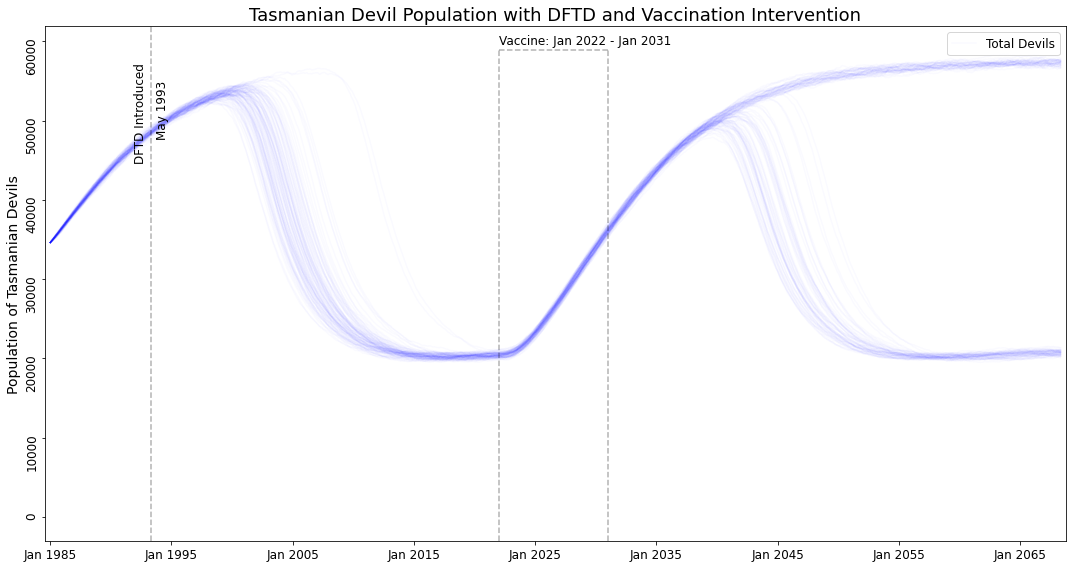

In [19]:
plot(sim, alpha=0.02)

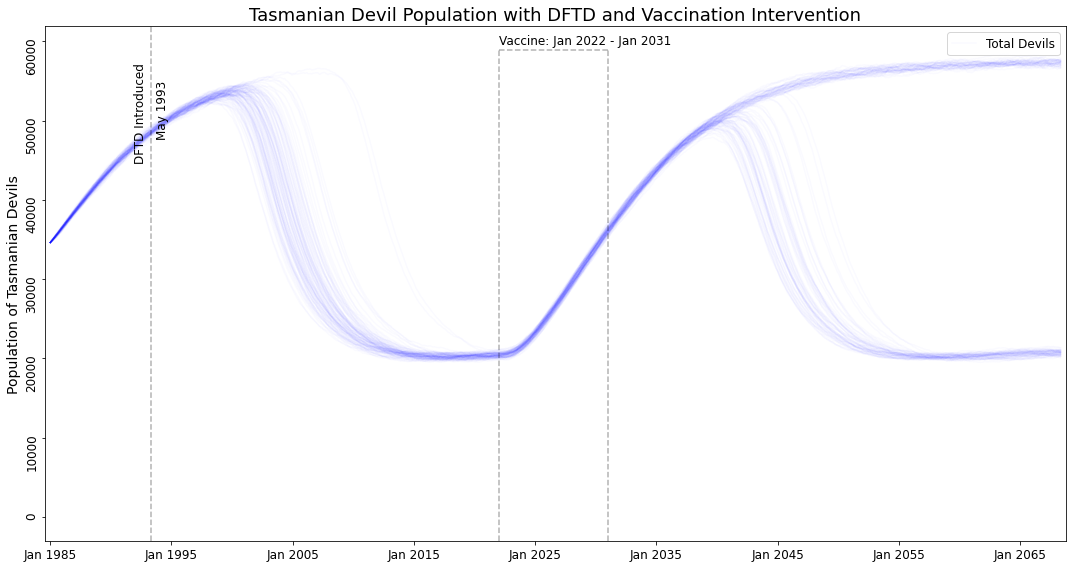

In [20]:
plot(sim, alpha=0.02, save_fig="DFTDmodel_sec4_vaccination-variable-success.pdf")